In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import solarpy as sp
from datetime import datetime, timedelta, time

# Beam irradiance on a normal plane

Irradiance during the day on a plane always perpendicular to the solar beam, on November 12 at the latitude 12 degrees north, for different altitudes:

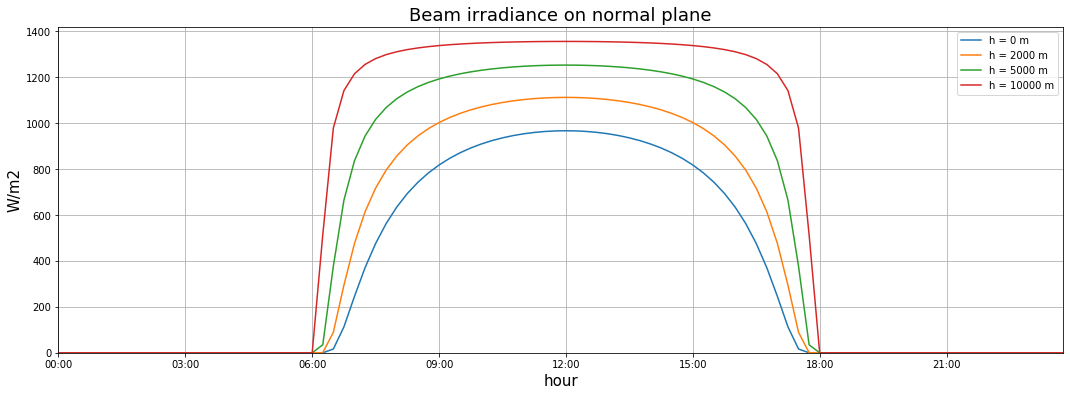

In [2]:
date = datetime(2019, 11, 12)  # November 12
lat = 12  # north hemisphere

fig, ax = plt.subplots(figsize=(18, 6))

for h in (0, 2e3, 5e3, 10e3):
    t = [date + timedelta(minutes=i) for i in range(0, 15 * 24 * 4, 15)]
    G = [sp.beam_irradiance(h, i, lat) for i in t]
    ax.plot(t, G, label='h = ' + str(int(h)) + ' m')
    myFmt = mdates.DateFormatter('%H:%M')
    ax.xaxis.set_major_formatter(myFmt)
    
plt.autoscale(enable=True, axis='x', tight=True)
plt.ylim(0, 1420)
plt.xlabel('hour', fontsize=15)
plt.ylabel('W/m2', fontsize=15)
plt.title('Beam irradiance on normal plane', fontsize=18)
plt.legend()
plt.grid(True)

# Irradiance on a fixed plane

Irradiance during different days on a fixed plane defined by its normal vector, at the latitude 52 degrees north at an altitude of 10km:

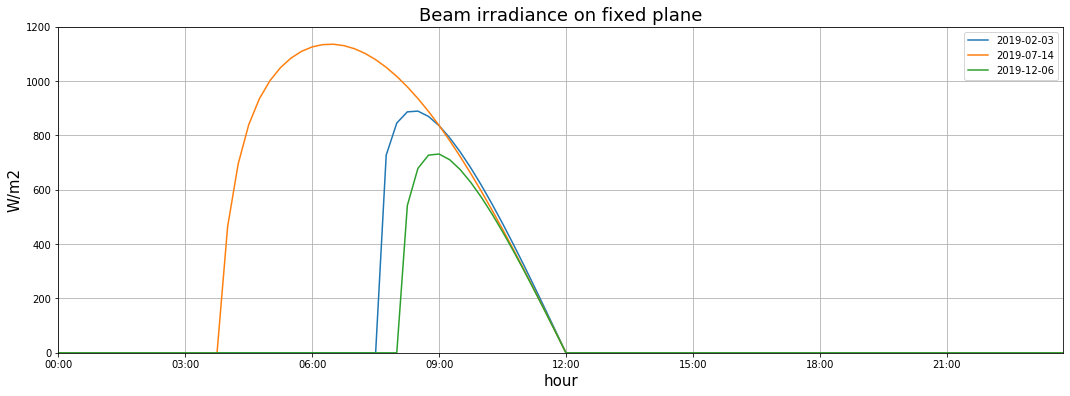

In [3]:
vnorm = np.array([0, 1, 0])  # plane pointing eastwards

date1 = datetime(2019, 2, 3)  # February 3
date2 = datetime(2019, 7, 14)  # July 14
date3 = datetime(2019, 12, 6)  # December 6

lat = 52  # north hemisphere
h = 10e3

fig, ax = plt.subplots(figsize=(18, 6))

for dt in (date1, date2, date3):
    t = [dt + timedelta(minutes=i) for i in range(0, 15 * 24 * 4, 15)]
    G = [sp.irradiance_on_plane(vnorm, h, i, lat) for i in t]

    # necessary as matplotlib expects a datetime.datetime, not a datetime.time
    t_ = [datetime.combine(datetime(2019, 1, 1), i) for i in [i.time() for i in t]]    
    plt.plot(t_, G, label=str(dt.date()))
    
myFmt = mdates.DateFormatter('%H:%M')
ax.xaxis.set_major_formatter(myFmt)

plt.autoscale(enable=True, axis='x', tight=True)
plt.ylim(0, 1200)
plt.xlabel('hour', fontsize=15)
plt.ylabel('W/m2', fontsize=15)
plt.title('Beam irradiance on fixed plane', fontsize=18)
plt.legend()
plt.grid(True)
plt.show()